# Öğrenci Performans Veri Analizi

## Veri Seti Hakkında Genel Bilgiler

Veri seti kaynağı: [https://www.kaggle.com/datasets/spscientist/students-performance-in-exams]

Veri setinin değişkenleri hakkında bilgiler:

- gender: Öğrencinin cinsiyeti

- race/ethnicity: Öğrencinin etnik kimliği

- parental level of education: Öğrencinin evebeynlerinin eğitim düzeyi

- lunch: Öğrencinin öğle yemeği

- test preparation course: Sınava hazırlık kursu

- math score: Öğrencinin matematik sınavı notu

- reading score: Öğrencinin okuma notu

- writing score: Öğrencinin yazma notu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
student_data = pd.read_csv("StudentsPerformance.csv")

### Keşifsel Veri Analizi(EDA)

Keşifsel veri analizi veri üzerinde işlem yapmadan önce veriyi tanımamızı sağlamak için yapılan işlemlerdir.

Bu işlemleri toplu yapmak adına önce bazı işlemleri fonksiyonlaştırıyoruz.

In [3]:
def basic_discoveries(data: pd.DataFrame):
    """
    Takes a dataframe and prints out its general information,
    first 5 indicies and its descriptive statistical values.

    parameter(s)
    ----------
    
    data: a pandas dataframe

    return(s)
    -------
    
    None
    
    """
    
    print("=====İlk Beş Veri===== \n\n")
    print(data.head())
    print("\n\n=======Veri Seti Hakkında Genel Bilgiler====\n\n")
    print(data.info())
    print("\n\n=======Veri Setinin Betimsel İstatistikleri====\n\n")
    print(data.describe().T)

In [4]:
basic_discoveries(student_data)

=====İlk Beş Veri===== 


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


=======Veri Seti Hakkında Genel Bilgiler====


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data column

Şimdi de kategorik değişkenlerin değerlerinin frekanslarına bakalım.

In [5]:
def print_categorical_values_count(data: pd.DataFrame):
    """
    Takes a dataframe and lists its categorical columns values and their frequency

    parameter(s)
    ----------

    data: pandas DataFrame

    return
    ------
    
    None
    """
    
    for column in data.columns:
        if (data[column].dtype == 'object') or (data[column].dtype.name == 'category'):
            print(f"Kategorik Değişken: {column.title()}\n")
            print(data[column].value_counts())
            print("\n")

In [6]:
print_categorical_values_count(student_data)

Kategorik Değişken: Gender

gender
female    518
male      482
Name: count, dtype: int64


Kategorik Değişken: Race/Ethnicity

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


Kategorik Değişken: Parental Level Of Education

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


Kategorik Değişken: Lunch

lunch
standard        645
free/reduced    355
Name: count, dtype: int64


Kategorik Değişken: Test Preparation Course

test preparation course
none         642
completed    358
Name: count, dtype: int64




## Veri Ön İşleme

Veri ön işlemeye başlamadan evvel üzerinde değişiklik yapacağımız veri setinin tedbir amaçlı kopyasını alalım.

In [7]:
student_df = student_data.copy()

Veri setini incelediğimizde öğrencilerin evebeynlerinin eğitim düzeyleri listelenirken bazı evebeynlerin eğitim düzeyi **high school** olarak kaydedilmişken bazılarının eğitim düzeyi **some high school** olarak kaydedilmiştir. Veri setindeki liselerin özel bir tür lise olduğu belirtilmediği için bu değişkendeki ilgili değerler bir tutarsızlık belirtir.

In [8]:
student_df['parental level of education'] = student_df['parental level of education'].replace('some high school', 'high school')

In [9]:
student_df['parental level of education'].value_counts()

parental level of education
high school           375
some college          226
associate's degree    222
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

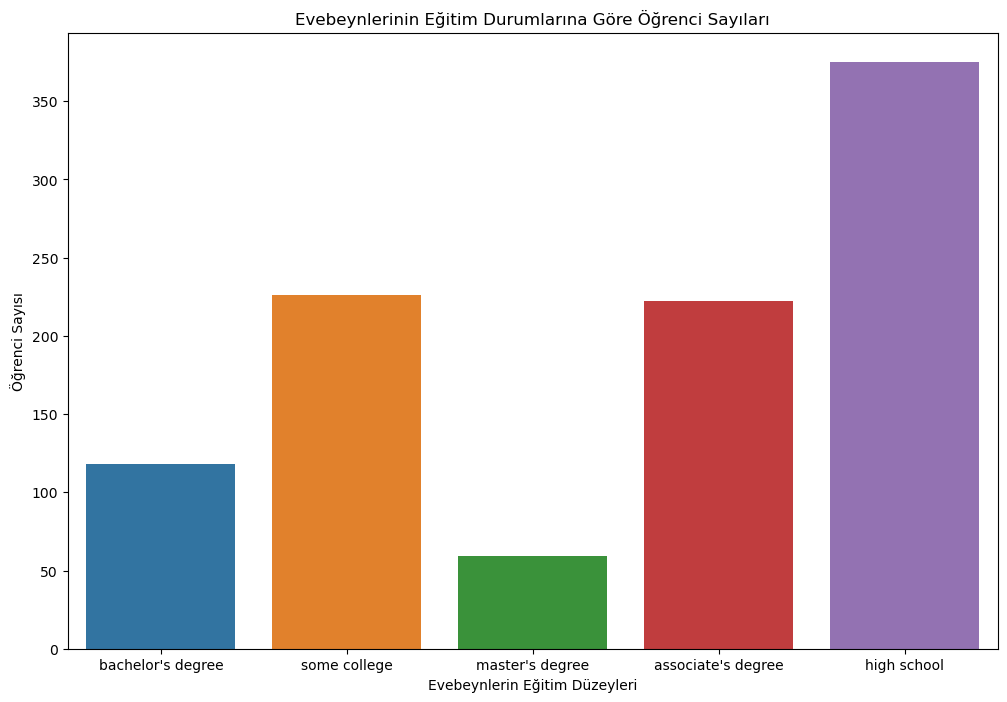

In [10]:
plt.figure(figsize=(12, 8))

sns.countplot(x='parental level of education', data = student_df);

plt.xlabel("Evebeynlerin Eğitim Düzeyleri")
plt.ylabel("Öğrenci Sayısı")
plt.title("Evebeynlerinin Eğitim Durumlarına Göre Öğrenci Sayıları")

plt.show()

'high school' değeri için yaptığımız değişikliğin aynısını 'some college' için yapmamız pek mantıklı olmaz. Çünkü veri setinde üniversiteye bağlı üç farklı eğitim düzeyi belirtilmiş ve eğitim düzeyi 'some college' olan evebeynlerin dağılımlarının nasıl olduğunu bilmiyoruz. Bu evebeynler arasında diğer üç üniversiye düzeyinden en az biri hiç alınmamış olabilir. (örneğin bu grubun yarısı dört yıllık bölümden yarısı iki yıllık bölümden mezun olmuşken aralarında yüksek lisans yapan kişi olmayabilir)

In [12]:
def categorical_mean_calculate(data, category, numeric):
    # Kategorik değişkenlere göre gruplama yapılır ve sayısal değişkenlerin ortalaması alınır
    means = data.groupby(category)[numeric].mean()
    return pd.DataFrame(means)

### Bazı sınavların kategorik değişkenlere göre ortalamaları

In [13]:
parental_level_math_score = categorical_mean_calculate(data=student_df,
                                                       category='parental level of education',
                                                       numeric='math score')

In [14]:
parental_level_math_score

,math score
parental level of education,
associate's degree,67.882883
bachelor's degree,69.389831
high school,62.786667
master's degree,69.745763
some college,67.128319


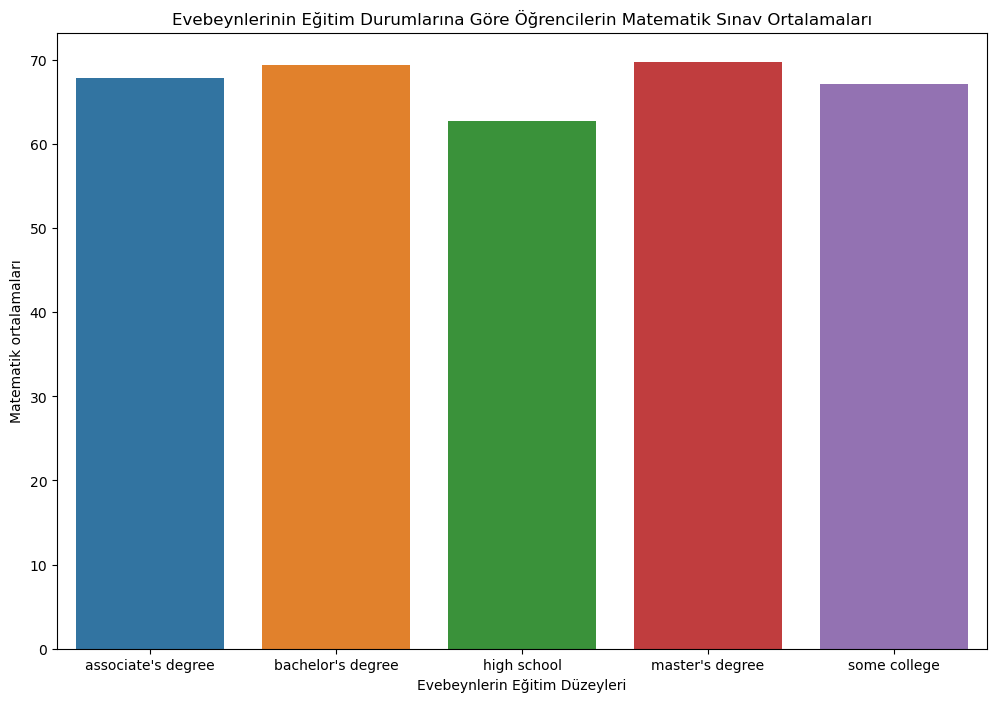

In [15]:
plt.figure(figsize=(12, 8))

sns.barplot(x=parental_level_math_score.index,  y= 'math score', data = parental_level_math_score);

plt.xlabel("Evebeynlerin Eğitim Düzeyleri")
plt.ylabel("Matematik ortalamaları")
plt.title("Evebeynlerinin Eğitim Durumlarına Göre Öğrencilerin Matematik Sınav Ortalamaları")

plt.show()

### Sınavlara Hazırlık Kursu Ve Sınavlar

C:\Users\snyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\snyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\snyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x800 with 0 Axes>

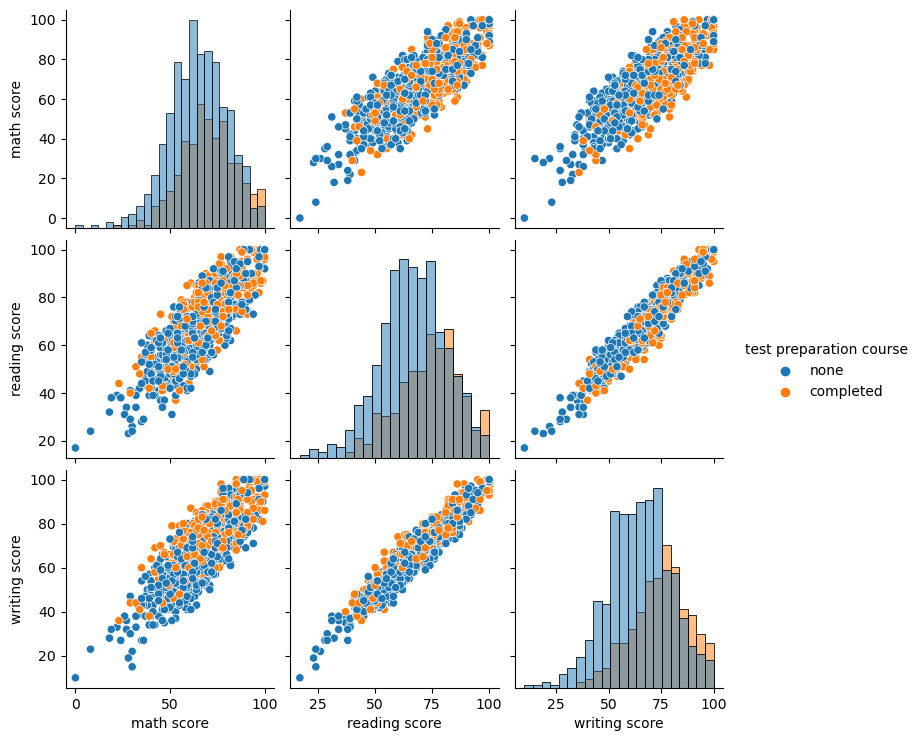

In [16]:
plt.figure(figsize=(12, 8))

sns.pairplot(student_df, hue="test preparation course", diag_kind="hist");

plt.show()

Yukarıdaki grafikten anlaşılacağı üzere sınava hazırlık kursu alan öğrencilerin 'writing' ve 'reading' sınavlarında hazırlık kursu almayanlara göre daha başarılı olduğu anlaşılabiliyor. Ama matematik sınavı için çok yüksek notlar haricinde hazırlık kursu almanın diğer sınavlara göre katkısı daha düşük olduğu görülüyor. Yani hazırlık kursu 'reading' ve 'writing' sınavlarında matematik sınavına göre daha verimli geçmiş.

### Aykırı Değer Analizi

<Axes: xlabel='math score'>

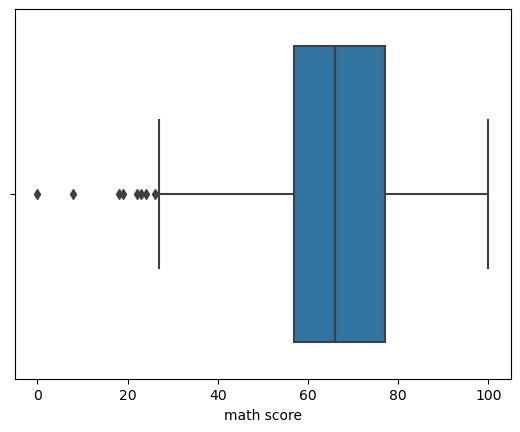

In [17]:
sns.boxplot(x=student_df['math score'])

<Axes: xlabel='reading score'>

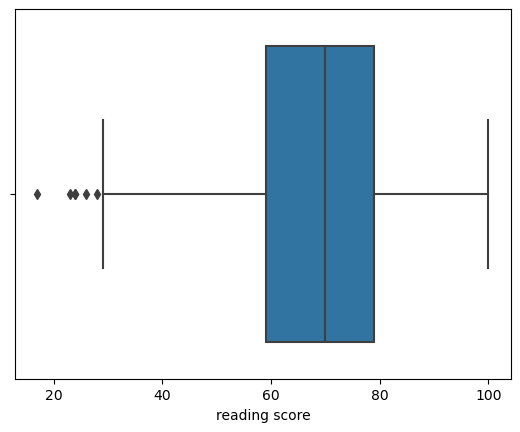

In [18]:
sns.boxplot(x=student_df['reading score'])

<Axes: xlabel='writing score'>

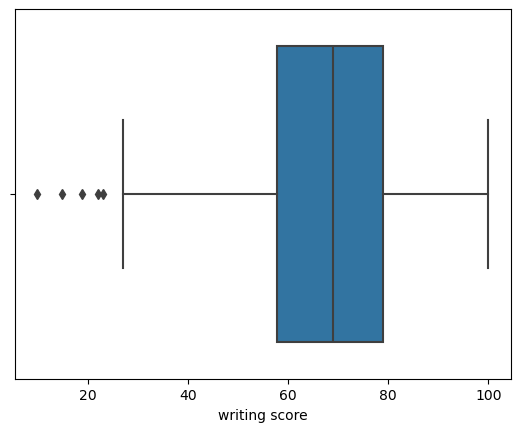

In [19]:
sns.boxplot(x=student_df['writing score'])

Üstteki üç grafikten de anlaşılacağı üzere her üç sınavda da beklenenden daha düşük not alanlar var. Fakat sınavlara giren öğrencilerin çoğunun notu birbirine yakındır. Bu durumda beklenenden daha düşük notları **aykırı değer** olarak değerlendirebiliriz.

Aykırı değerlerle baş etmenin birden fazla yolu vardır. Bunlardan biri çeyrekler açıklığı ve standart sapmadan faydalanmaktır.

- q1, q2, q3: Çeyreklikler
- std: Standart sapma
- iqr: q1 - std (düşük değerler için eşik değeri)
- iqr: q3 + std (yüksek değerler için eşik değeri)

**Not**: Eşik değerin hassasiyetini belirlemek için standart sapmayı çeşitli katsayılarla çarpabiliriz. 

Veri setimiz sınav notları ile alakalı olduğu için bir öğrenci olabilecek en düşük notu da olabilecek en yüksek notu da alabilir. Fakat en başta belirtildiği gibi öğrencilerin notlarının çoğu en yüksek nota doğru olup birbirine yakın yerlerde toplandığı için düşük notları aykırı değer olarak kabul etmek ve birinci çeyrekten standart sapmayı çıkararak bulacağımız eşik değerini kullanmak daha faydalı olacaktır.

In [59]:
def q1_iqr_calculator(data: pd.DataFrame, numeric_col: str):
    """
    Takes dataframe and its numerical(int64, float64) feature 
    and calculates its first quantile and its standard deviation.
    Then calculates its lower iqr by substracting standard deviation
    from first quantile.

    parameter(s)
    ------------

    data: pandas.DataFrame

    numeric_col: str

    return(s)
    ---------

    iqr: float
    """
    q1 = np.percentile(data[numeric_col], 25)
    std = np.std(data[numeric_col])
    iqr = q1 - std
        
    return iqr

Sınavların iqr değerleri

In [25]:
math_iqr = q1_iqr_calculator(student_df, 'math score')
writing_iqr = q1_iqr_calculator(student_df, 'writing score')
reading_iqr = q1_iqr_calculator(student_df, 'reading score')

In [28]:
filtered_df = student_df[student_df['math score'] >= math_iqr]

print(filtered_df['math score'].mean())

68.02118644067797


In [29]:
filtered_df = student_df[student_df['writing score'] >= writing_iqr]

print(filtered_df['writing score'].mean())

69.78210526315789


In [30]:
filtered_df = student_df[student_df['reading score'] >= writing_iqr]

print(filtered_df['reading score'].mean())

70.56041666666667


In [34]:
student_df = filtered_df

### Kolerasyon Analizi

Veri setindeki değişkenlerinin birbirleriyle olan ilişkisini daha iyi anlamak için kolerasyon analizi yaparız.

Bu veri setindeki iki kategorik değişkenimiz olan **test preparation course** ve **lunch** değişkenlerimizin her ikisinin de ikişer değere sahip olduğu için bu verileri yeni birer özellik olara veri setimize ekleyebiliriz.

In [58]:
def label_encoding(data: pd.DataFrame, feature: str):
    """
    Takes dataframe and its categorical feature and seperates categorical values then
    adds those values as features to the dataframe

    parameter(s)
    ------------

    data: pandas.DataFrame

    feature: str

    return(s)
    ---------

    df: pandas.DataFrame
    """
    df = data.copy()
    df = (df
          .join(pd.get_dummies(df[feature]))
          .drop([feature], axis=1))
    return df

In [ ]:
Yukarıdaki hücredeki 

In [38]:
test_prep_label = label_encoding(data=student_df, feature='test preparation course')

In [39]:
test_prep_label.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,completed,none
0,female,group B,bachelor's degree,standard,72,72,74,False,True
1,female,group C,some college,standard,69,90,88,True,False
2,female,group B,master's degree,standard,90,95,93,False,True
3,male,group A,associate's degree,free/reduced,47,57,44,False,True
4,male,group C,some college,standard,76,78,75,False,True


In [47]:
test_prep_label.corr(numeric_only=True)

,math score,reading score,writing score,completed,none
math score,1.000000,0.786066,0.766203,0.153243,-0.153243
reading score,0.786066,1.000000,0.944201,0.226609,-0.226609
writing score,0.766203,0.944201,1.000000,0.304872,-0.304872
completed,0.153243,0.226609,0.304872,1.000000,-1.000000
none,-0.153243,-0.226609,-0.304872,-1.000000,1.000000


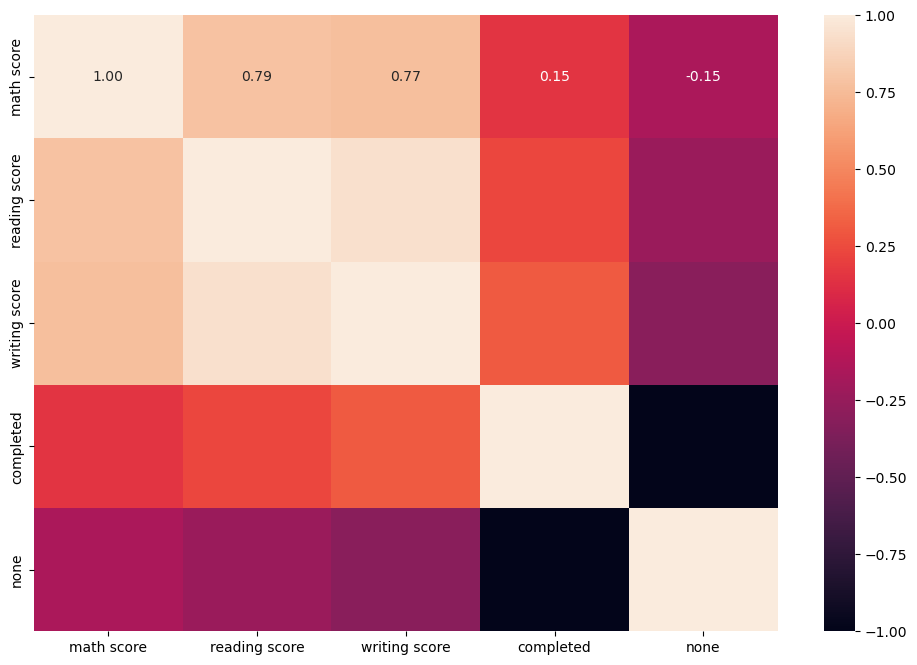

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(test_prep_label.corr(numeric_only=True), annot=True, fmt=".2f");

In [40]:
student_df = test_prep_label

In [49]:
lunch_label_encoding = label_encoding(data=student_df, feature='lunch')

In [50]:
lunch_label_encoding.head()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,completed,none,free/reduced,standard
0,female,group B,bachelor's degree,72,72,74,False,True,False,True
1,female,group C,some college,69,90,88,True,False,False,True
2,female,group B,master's degree,90,95,93,False,True,False,True
3,male,group A,associate's degree,47,57,44,False,True,True,False
4,male,group C,some college,76,78,75,False,True,False,True


In [51]:
lunch_label_encoding.corr(numeric_only=True)

,math score,reading score,writing score,completed,none,free/reduced,standard
math score,1.000000,0.786066,0.766203,0.153243,-0.153243,-0.319466,0.319466
reading score,0.786066,1.000000,0.944201,0.226609,-0.226609,-0.186396,0.186396
writing score,0.766203,0.944201,1.000000,0.304872,-0.304872,-0.205227,0.205227
completed,0.153243,0.226609,0.304872,1.000000,-1.000000,0.032384,-0.032384
none,-0.153243,-0.226609,-0.304872,-1.000000,1.000000,-0.032384,0.032384
free/reduced,-0.319466,-0.186396,-0.205227,0.032384,-0.032384,1.000000,-1.000000
standard,0.319466,0.186396,0.205227,-0.032384,0.032384,-1.000000,1.000000


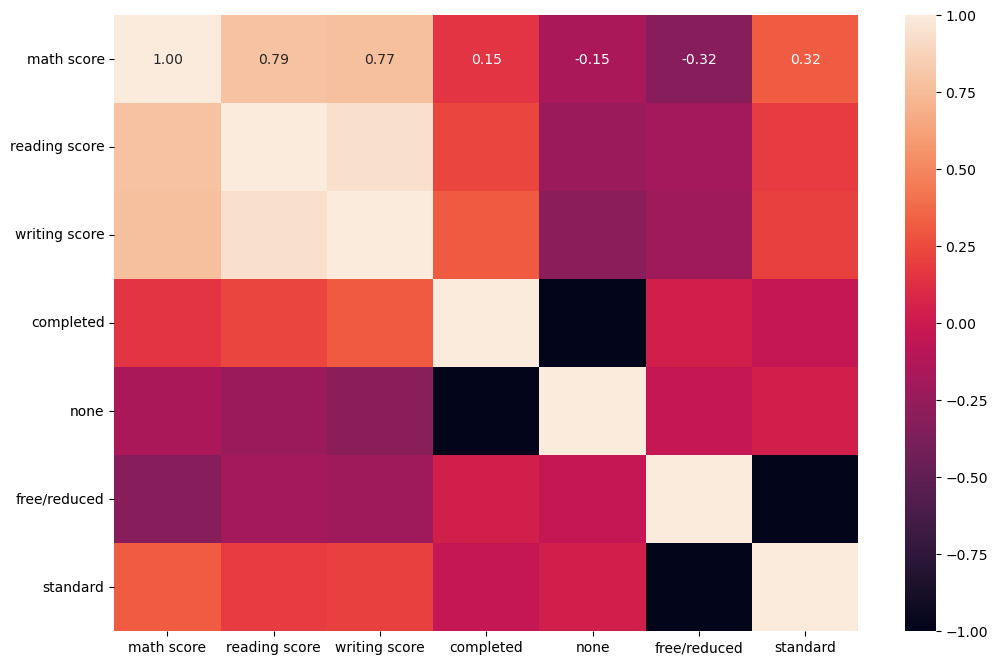

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(lunch_label_encoding.corr(numeric_only=True), annot=True, fmt=".2f");

Bu ısı haritasından ve korelasyon tablolarından anlaşılabileceği üzere sınava hazırlık kursu almış öğrencilerin genel sınav başarısı hazırlık kursu almayan öğrencilere göre daha yüksektir.

In [55]:
student_df = lunch_label_encoding

### İşleniş Veri Seti ile İşlenmemiş Veri Setinin Karşılaştırılması

In [56]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       960 non-null    object
 1   race/ethnicity               960 non-null    object
 2   parental level of education  960 non-null    object
 3   math score                   960 non-null    int64 
 4   reading score                960 non-null    int64 
 5   writing score                960 non-null    int64 
 6   completed                    960 non-null    bool  
 7   none                         960 non-null    bool  
 8   free/reduced                 960 non-null    bool  
 9   standard                     960 non-null    bool  
dtypes: bool(4), int64(3), object(3)
memory usage: 88.5+ KB


In [57]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
